In [1]:
import psycopg2

import copy
import random
import numpy as np
import pandas as pd

import joblib
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import torch
from torch import nn
from torch.utils.data import Subset, DataLoader

from Dataset.Embedding_Dataset import Embedding_Dataset
from Model.Embedding import Embedding

from Dataset.Apartment_Complex_Dataset import Apartment_Complex_Dataset
from Model.LSTM import LSTM
from Model.GRU import GRU
from Model.Transformer import Transformer

from Dataset.District_Dataset import District_Dataset
from Model.LSTM_Attention import LSTMAttention
from Model.GRU_Attention import GRUAttention
from Model.Transformer_Attention import TransformerAttention

from utils import RMSE, rmse, mse, mae, mape, save_train_val_losses

SEED = 1234
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = True

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

table_1 = pd.read_csv('../데이터/Table/table_1.csv') 
table_2 = pd.read_csv('../데이터/Table/table_2.csv') 
table_3 = pd.read_csv('../데이터/Table/table_3.csv') 

In [2]:
train_ratio = 0.7
val_ratio = 0.2
test_ratio = 0.1

epochs = 10000
lr = 1e-4
batch = 64
sub = True
embedding_dims = [256, 512, 1024]
window_sizes = [6, 12, 36]

### train/val

Embedding	 Epoch [1/10000], Train Loss: 2.691511, Val Loss: 4.174492
Embedding	 Epoch [2/10000], Train Loss: 0.686539, Val Loss: 3.279496
Embedding	 Epoch [3/10000], Train Loss: 0.628412, Val Loss: 3.185184
Embedding	 Epoch [4/10000], Train Loss: 0.580377, Val Loss: 3.132907
Embedding	 Epoch [5/10000], Train Loss: 0.546099, Val Loss: 3.108948
Embedding	 Epoch [6/10000], Train Loss: 0.518425, Val Loss: 3.078731
Embedding	 Epoch [7/10000], Train Loss: 0.497050, Val Loss: 3.072149
Embedding	 Epoch [8/10000], Train Loss: 0.479025, Val Loss: 3.050579
Embedding	 Epoch [9/10000], Train Loss: 0.462053, Val Loss: 3.039966
Embedding	 Epoch [10/10000], Train Loss: 0.447593, Val Loss: 3.027392
Embedding	 Epoch [11/10000], Train Loss: 0.433371, Val Loss: 3.011299
Embedding	 Epoch [12/10000], Train Loss: 0.420582, Val Loss: 3.029461
Embedding	 Epoch [13/10000], Train Loss: 0.410030, Val Loss: 2.958327
Embedding	 Epoch [14/10000], Train Loss: 0.399629, Val Loss: 2.988436
Embedding	 Epoch [15/10000], 

C:\Users\USER\AppData\Local\Temp\ipykernel_13620\2399924745.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Embedding	 Epoch [1/10000], Train Loss: 2.820223, Val Loss: 4.288096
Embedding	 Epoch [2/10000], Train Loss: 0.680887, Val Loss: 3.222119
Embedding	 Epoch [3/10000], Train Loss: 0.626924, Val Loss: 3.132281
Embedding	 Epoch [4/10000], Train Loss: 0.579559, Val Loss: 3.073628
Embedding	 Epoch [5/10000], Train Loss: 0.545502, Val Loss: 3.029195
Embedding	 Epoch [6/10000], Train Loss: 0.517922, Val Loss: 2.987049
Embedding	 Epoch [7/10000], Train Loss: 0.495757, Val Loss: 2.982118
Embedding	 Epoch [8/10000], Train Loss: 0.476553, Val Loss: 2.960867
Embedding	 Epoch [9/10000], Train Loss: 0.461327, Val Loss: 2.959363
Embedding	 Epoch [10/10000], Train Loss: 0.445645, Val Loss: 2.948445
Embedding	 Epoch [11/10000], Train Loss: 0.431188, Val Loss: 2.948864
Embedding	 Epoch [12/10000], Train Loss: 0.419242, Val Loss: 2.948785
Embedding	 Epoch [13/10000], Train Loss: 0.409935, Val Loss: 2.962375 
Early Stop Triggered!
Min Train Loss: 0.4099350881395918
Min Val Loss: 2.9484451221341783
Transfor

C:\Users\USER\AppData\Local\Temp\ipykernel_13620\2399924745.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Embedding	 Epoch [1/10000], Train Loss: 2.868630, Val Loss: 4.794413
Embedding	 Epoch [2/10000], Train Loss: 0.710871, Val Loss: 3.522568
Embedding	 Epoch [3/10000], Train Loss: 0.638268, Val Loss: 3.376236
Embedding	 Epoch [4/10000], Train Loss: 0.589011, Val Loss: 3.300140
Embedding	 Epoch [5/10000], Train Loss: 0.554462, Val Loss: 3.229333
Embedding	 Epoch [6/10000], Train Loss: 0.527842, Val Loss: 3.192822
Embedding	 Epoch [7/10000], Train Loss: 0.505491, Val Loss: 3.184837
Embedding	 Epoch [8/10000], Train Loss: 0.485724, Val Loss: 3.153296
Embedding	 Epoch [9/10000], Train Loss: 0.467698, Val Loss: 3.146536
Embedding	 Epoch [10/10000], Train Loss: 0.452078, Val Loss: 3.123244
Embedding	 Epoch [11/10000], Train Loss: 0.437240, Val Loss: 3.103764
Embedding	 Epoch [12/10000], Train Loss: 0.423527, Val Loss: 3.085770
Embedding	 Epoch [13/10000], Train Loss: 0.410903, Val Loss: 3.082884
Embedding	 Epoch [14/10000], Train Loss: 0.398594, Val Loss: 3.077907
Embedding	 Epoch [15/10000], 

C:\Users\USER\AppData\Local\Temp\ipykernel_13620\2399924745.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Embedding	 Epoch [1/10000], Train Loss: 2.907901, Val Loss: 4.689456
Embedding	 Epoch [2/10000], Train Loss: 0.688701, Val Loss: 3.320739
Embedding	 Epoch [3/10000], Train Loss: 0.623644, Val Loss: 3.245912
Embedding	 Epoch [4/10000], Train Loss: 0.572159, Val Loss: 3.172281
Embedding	 Epoch [5/10000], Train Loss: 0.537190, Val Loss: 3.137837
Embedding	 Epoch [6/10000], Train Loss: 0.509800, Val Loss: 3.117202
Embedding	 Epoch [7/10000], Train Loss: 0.487045, Val Loss: 3.121630
Embedding	 Epoch [8/10000], Train Loss: 0.468008, Val Loss: 3.112559
Embedding	 Epoch [9/10000], Train Loss: 0.450843, Val Loss: 3.137026
Embedding	 Epoch [10/10000], Train Loss: 0.436465, Val Loss: 3.147764
Embedding	 Epoch [11/10000], Train Loss: 0.423456, Val Loss: 3.134526 
Early Stop Triggered!
Min Train Loss: 0.42345604194384634
Min Val Loss: 3.1125592979344914
Transformer	 Epoch [1/10000], Train Loss: 3.979823, Val Loss: 4.014244
Transformer	 Epoch [2/10000], Train Loss: 3.774739, Val Loss: 3.861305
Trans

C:\Users\USER\AppData\Local\Temp\ipykernel_13620\2399924745.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Embedding	 Epoch [1/10000], Train Loss: 2.835907, Val Loss: 4.756550
Embedding	 Epoch [2/10000], Train Loss: 0.694956, Val Loss: 3.488156
Embedding	 Epoch [3/10000], Train Loss: 0.633267, Val Loss: 3.352349
Embedding	 Epoch [4/10000], Train Loss: 0.584024, Val Loss: 3.230402
Embedding	 Epoch [5/10000], Train Loss: 0.549609, Val Loss: 3.176133
Embedding	 Epoch [6/10000], Train Loss: 0.519926, Val Loss: 3.154628
Embedding	 Epoch [7/10000], Train Loss: 0.495799, Val Loss: 3.156580
Embedding	 Epoch [8/10000], Train Loss: 0.474809, Val Loss: 3.141817
Embedding	 Epoch [9/10000], Train Loss: 0.456408, Val Loss: 3.135414
Embedding	 Epoch [10/10000], Train Loss: 0.440247, Val Loss: 3.116409
Embedding	 Epoch [11/10000], Train Loss: 0.424966, Val Loss: 3.104204
Embedding	 Epoch [12/10000], Train Loss: 0.409983, Val Loss: 3.114429
Embedding	 Epoch [13/10000], Train Loss: 0.398030, Val Loss: 3.089877
Embedding	 Epoch [14/10000], Train Loss: 0.386678, Val Loss: 3.103927
Embedding	 Epoch [15/10000], 

C:\Users\USER\AppData\Local\Temp\ipykernel_13620\2399924745.py:267: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


Embedding	 Epoch [1/10000], Train Loss: 2.555715, Val Loss: 3.983702
Embedding	 Epoch [2/10000], Train Loss: 0.675334, Val Loss: 3.098135
Embedding	 Epoch [3/10000], Train Loss: 0.622419, Val Loss: 2.971362
Embedding	 Epoch [4/10000], Train Loss: 0.573446, Val Loss: 2.912646
Embedding	 Epoch [5/10000], Train Loss: 0.539280, Val Loss: 2.900557
Embedding	 Epoch [6/10000], Train Loss: 0.512494, Val Loss: 2.895371
Embedding	 Epoch [7/10000], Train Loss: 0.489286, Val Loss: 2.873776
Embedding	 Epoch [8/10000], Train Loss: 0.469948, Val Loss: 2.863860
Embedding	 Epoch [9/10000], Train Loss: 0.453359, Val Loss: 2.875301
Embedding	 Epoch [10/10000], Train Loss: 0.437284, Val Loss: 2.865549
Embedding	 Epoch [11/10000], Train Loss: 0.423859, Val Loss: 2.867238 
Early Stop Triggered!
Min Train Loss: 0.4238585347253265
Min Val Loss: 2.8638595108022082
Transformer	 Epoch [1/10000], Train Loss: 4.088533, Val Loss: 4.001967
Transformer	 Epoch [2/10000], Train Loss: 3.941468, Val Loss: 3.938085
Transf

RuntimeError: [enforce fail at ..\c10\core\impl\alloc_cpu.cpp:81] data. DefaultCPUAllocator: not enough memory: you tried to allocate 57848758272 bytes.

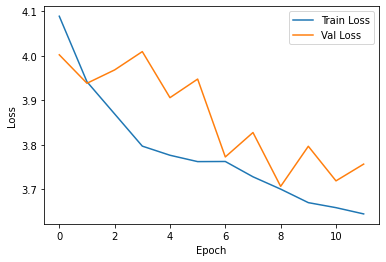

In [3]:
results_df = pd.DataFrame(columns=['lr','batch','sub','embedding_dim','window_size','val_loss'])
for embedding_dim in embedding_dims:
    for window_size in window_sizes:
        ### embedding
        dataset = Embedding_Dataset(table_1, table_2, table_3, DEVICE)
        dataset_length = len(dataset)
        train_size = int(train_ratio * dataset_length)
        train_indices = range(0, train_size)
        val_size = int(val_ratio * dataset_length)
        val_indices = range(train_size, train_size + val_size)
        # test_size = int(test_ratio * dataset_length)
        # test_indices = range(train_size + val_size, dataset_length)
        train_dataset = Subset(dataset, train_indices)
        val_dataset = Subset(dataset, val_indices)
        # test_dataset = Subset(dataset, test_indices)
        train_dataloader = DataLoader(train_dataset, batch_size=batch, shuffle=False, drop_last=True)
        val_dataloader = DataLoader(val_dataset, batch_size=batch, shuffle=False, drop_last=True)
        # test_dataloader = DataLoader(test_dataset, batch_size=batch, shuffle=False, drop_last=True)

        embedding_model = Embedding(128, 256, 512, embedding_dim, 512, 256, 128).to(DEVICE)
        criterion = RMSE()
        optimizer = torch.optim.Adam(embedding_model.parameters(), lr=lr)

        embedding_train_losses = []
        embedding_val_losses = []

        max_early_stop_count = 3
        early_stop_count = 0
        embedding_best_val_loss = float('inf')
        embedding_best_model_weights = None

        for epoch in range(epochs):
            embedding_model.train()
            embedding_total_train_loss = 0
            for data in train_dataloader:
                input = data[0].to(DEVICE)
                target = data[1].to(DEVICE)
                output = embedding_model(input).to(DEVICE)

                embedding_train_loss = criterion(output, target)
                embedding_total_train_loss += embedding_train_loss.item()

                optimizer.zero_grad()
                embedding_train_loss.backward()
                optimizer.step()

            embedding_avg_train_loss = embedding_total_train_loss / len(train_dataloader)
            embedding_train_losses.append(embedding_avg_train_loss)

            embedding_model.eval()
            embedding_total_val_loss = 0
            with torch.no_grad():
                for data in val_dataloader:
                    input = data[0].to(DEVICE)
                    target = data[1].to(DEVICE)
                    output = embedding_model(input).to(DEVICE)

                    embedding_val_loss = criterion(output, target)
                    embedding_total_val_loss += embedding_val_loss.item()

            embedding_avg_val_loss = embedding_total_val_loss / len(val_dataloader)
            embedding_val_losses.append(embedding_avg_val_loss)

            if  embedding_best_val_loss > embedding_avg_val_loss:
                embedding_best_val_loss = embedding_avg_val_loss
                embedding_best_model_weights = copy.deepcopy(embedding_model.state_dict())
                early_stop_count = 0
            else:
                early_stop_count += 1

            if early_stop_count >= max_early_stop_count:
                print(f'Embedding\t Epoch [{epoch+1}/{epochs}], Train Loss: {embedding_avg_train_loss:.6f}, Val Loss: {embedding_avg_val_loss:.6f} \nEarly Stop Triggered!')
                embedding_model.load_state_dict(embedding_best_model_weights)
                torch.save(embedding_model, f'../데이터/Checkpoint/emb/embedding_lr_{lr}_batch_{batch}_sub_{sub}_ed_{embedding_dim}_ws_{window_size}_epochs_{epoch+1}.pth')
                break

            print(f'Embedding\t Epoch [{epoch+1}/{epochs}], Train Loss: {embedding_avg_train_loss:.6f}, Val Loss: {embedding_avg_val_loss:.6f}')
            
        save_train_val_losses(embedding_train_losses, embedding_val_losses, f'../데이터/Checkpoint/emb/embedding_lr_{lr}_batch_{batch}_sub_{sub}_ed_{embedding_dim}_ws_{window_size}_epochs_{epoch+1}')

        ### transformer
        dataset = Apartment_Complex_Dataset(embedding_model, table_1, table_2, table_3, embedding_dim, window_size, 'DL', DEVICE)
        dataset_length = len(dataset)
        train_size = int(train_ratio * dataset_length)
        train_indices = range(0, train_size)
        val_size = int(val_ratio * dataset_length)
        val_indices = range(train_size, train_size + val_size)
        # test_size = int(test_ratio * dataset_length)
        # test_indices = range(train_size + val_size, dataset_length)
        train_dataset = Subset(dataset, train_indices)
        val_dataset = Subset(dataset, val_indices)
        # test_dataset = Subset(dataset, test_indices)
        train_dataloader = DataLoader(train_dataset, batch_size=batch, shuffle=False, drop_last=True)
        val_dataloader = DataLoader(val_dataset, batch_size=batch, shuffle=False, drop_last=True)
        # test_dataloader = DataLoader(test_dataset, batch_size=batch, shuffle=False, drop_last=True)

        transformer_model = Transformer(embedding_dim, 1, 2, 2).to(DEVICE)
        criterion = RMSE()
        optimizer = torch.optim.Adam(transformer_model.parameters(), lr=lr)

        transformer_train_losses = []
        transformer_val_losses = []

        max_early_stop_count = 3
        early_stop_count = 0
        transformer_best_val_loss = float('inf')
        transformer_best_model_weights = None

        for epoch in range(epochs):
            transformer_model.train()
            transformer_total_train_loss = 0
            transformer_total_train_num = 1e-9
            for data in train_dataloader:
                src = data[0].to(DEVICE)
                trg = data[1].to(DEVICE)

                if (trg[0] != 0):
                    transformer_total_train_num += 1

                    src_mask = transformer_model.generate_square_subsequent_mask(src.shape[1]).to(src.device)
                    output = transformer_model(src, src_mask)

                    transformer_train_loss = criterion(output[0], trg)
                    transformer_total_train_loss += transformer_train_loss.item()

                    optimizer.zero_grad()
                    transformer_train_loss.backward()
                    optimizer.step()
                    
            transformer_avg_train_loss = transformer_total_train_loss / transformer_total_train_num
            transformer_train_losses.append(transformer_avg_train_loss)

            transformer_model.eval()
            transformer_total_val_loss = 0
            transformer_total_val_num = 1e-9
            with torch.no_grad():
                for data in val_dataloader:
                    src = data[0].to(DEVICE)
                    trg = data[1].to(DEVICE)

                    if (trg[0] != 0):
                        transformer_total_val_num += 1

                        src_mask = transformer_model.generate_square_subsequent_mask(src.shape[1]).to(src.device)
                        output = transformer_model(src, src_mask)

                        transformer_val_loss = criterion(output[0], trg)
                        transformer_total_val_loss += transformer_val_loss.item()

            transformer_avg_val_loss = transformer_total_val_loss / transformer_total_val_num
            transformer_val_losses.append(transformer_avg_val_loss)

            if  transformer_best_val_loss > transformer_avg_val_loss:
                transformer_best_val_loss = transformer_avg_val_loss
                transformer_best_model_weights = copy.deepcopy(transformer_model.state_dict())
                early_stop_count = 0
            else:
                early_stop_count += 1
                
            if early_stop_count >= max_early_stop_count:
                print(f'Transformer\t Epoch [{epoch+1}/{epochs}], Train Loss: {transformer_avg_train_loss:.6f}, Val Loss: {transformer_avg_val_loss:.6f} \nEarly Stop Triggered!')
                transformer_model.load_state_dict(transformer_best_model_weights)
                torch.save(transformer_model, f'../데이터/Checkpoint/transformer/transformer_lr_{lr}_batch_{batch}_sub_{sub}_ed_{embedding_dim}_ws_{window_size}_epochs_{epoch+1}.pth')
                break

            print(f'Transformer\t Epoch [{epoch+1}/{epochs}], Train Loss: {transformer_avg_train_loss:.6f}, Val Loss: {transformer_avg_val_loss:.6f}')
        
        save_train_val_losses(transformer_train_losses, transformer_val_losses, f'../데이터/Checkpoint/transformer/transformer_lr_{lr}_batch_{batch}_sub_{sub}_ed_{embedding_dim}_ws_{window_size}_epochs_{epoch+1}')

        ### transformer attention
        dataset = District_Dataset(embedding_model, table_1, table_2, table_3, embedding_dim, window_size, sub, DEVICE)
        dataset_length = len(dataset)
        train_size = int(train_ratio * dataset_length)
        train_indices = range(0, train_size)
        val_size = int(val_ratio * dataset_length)
        val_indices = range(train_size, train_size + val_size)
        # test_size = int(test_ratio * dataset_length)
        # test_indices = range(train_size + val_size, dataset_length)
        train_dataset = Subset(dataset, train_indices)
        val_dataset = Subset(dataset, val_indices)
        # test_dataset = Subset(dataset, test_indices)
        train_dataloader = DataLoader(train_dataset, batch_size=batch, shuffle=False, drop_last=True)
        val_dataloader = DataLoader(val_dataset, batch_size=batch, shuffle=False, drop_last=True)
        # test_dataloader = DataLoader(test_dataset, batch_size=batch, shuffle=False, drop_last=True)

        transformer_att_model = TransformerAttention(transformer_model, embedding_dim, 1, DEVICE).to(DEVICE)
        criterion = RMSE()
        optimizer = torch.optim.Adam(transformer_att_model.parameters(), lr=lr)

        transformer_att_train_losses = []
        transformer_att_val_losses = []

        max_early_stop_count = 3
        early_stop_count = 0
        transformer_att_best_val_loss = float('inf')
        transformer_att_best_model_weights = None

        for epoch in range(epoch):
            transformer_att_model.train()
            transformer_att_total_train_loss = 0
            transformer_att_total_train_num = 1e-9
            for data in train_dataloader:
                src = data[0][0].to(DEVICE)
                max_len = data[1][0].to(DEVICE)
                try:
                    anw = torch.nonzero(data[2][0]).to(DEVICE)[0]
                except:
                    continue
                trg = data[3][0].to(DEVICE)
                
                transformer_att_total_train_num += len(anw)

                for index in anw:
                    output = transformer_att_model(src, index, max_len)
                    
                    transformer_att_train_loss = criterion(output, trg[index])
                    transformer_att_total_train_loss += transformer_att_train_loss.item()
                    
                    optimizer.zero_grad()
                    transformer_att_train_loss.backward()
                    optimizer.step() 
                    
            transformer_att_avg_train_loss = transformer_att_total_train_loss / transformer_att_total_train_num
            transformer_att_train_losses.append(transformer_att_avg_train_loss)

            transformer_att_model.eval()
            transformer_att_total_val_loss = 0
            transformer_att_total_val_num = 1e-9
            with torch.no_grad():
                for data in val_dataloader:
                    src = data[0][0].to(DEVICE)
                    max_len = data[1][0].to(DEVICE)
                    try:
                        anw = torch.nonzero(data[2][0]).to(DEVICE)[0]
                    except:
                        continue
                    trg = data[3][0].to(DEVICE)
                    
                    transformer_att_total_val_num += len(anw)

                    for index in anw:
                        output = transformer_att_model(src, index, max_len)

                        transformer_att_val_loss = criterion(output, trg[index])
                        transformer_att_total_val_loss += transformer_att_val_loss.item()
                        
            transformer_att_avg_val_loss = transformer_att_total_val_loss / transformer_att_total_val_num
            transformer_att_val_losses.append(transformer_att_avg_val_loss)
                    
            if  transformer_att_best_val_loss > transformer_att_avg_val_loss:
                transformer_att_best_val_loss = transformer_att_avg_val_loss
                transformer_att_best_model_weights = copy.deepcopy(transformer_att_model.state_dict())
                early_stop_count = 0
            else:
                early_stop_count += 1

            if early_stop_count >= max_early_stop_count:
                print(f'Attention\t Epoch [{epoch+1}/{epochs}], Train Loss: {transformer_att_avg_train_loss:.6f}, Val Loss: {transformer_att_avg_val_loss:.6f} \nEarly Stop Triggered!')
                transformer_att_model.load_state_dict(transformer_att_best_model_weights)
                torch.save(transformer_att_model, f'../데이터/Checkpoint/attention/attention_lr_{lr}_batch_{batch}_sub_{sub}_ed_{embedding_dim}_ws_{window_size}_epochs_{epoch+1}.pth')
                break

            print(f'Attention\t Epoch [{epoch+1}/{epochs}], Train Loss: {transformer_att_avg_train_loss:.6f}, Val Loss: {transformer_att_avg_val_loss:.6f}')

        save_train_val_losses(transformer_att_train_losses, transformer_att_val_losses, f'../데이터/Checkpoint/attention/attention_lr_{lr}_batch_{batch}_sub_{sub}_ed_{embedding_dim}_ws_{window_size}_epochs_{epoch+1}')

        results_df = results_df.append({
            'lr': lr,
            'batch': batch,
            'sub': sub,
            'embedding_dim': embedding_dim,
            'window_size': window_size,
            'val_loss': min(transformer_att_val_losses),
        }, ignore_index=True)

results_df = results_df.sort_values('val_loss')
results_df.to_excel('../데이터/Checkpoint/experiment_results.xlsx')

### test

In [ ]:
transformer_att_model

In [ ]:
# transformer attention
dataset = District_Dataset(embedding_model, table_1, table_2, table_3, embedding_dim, window_size, sub, DEVICE)
dataset_length = len(dataset)
train_size = int(train_ratio * dataset_length)
# train_indices = range(0, train_size)
val_size = int(val_ratio * dataset_length)
# val_indices = range(train_size, train_size + val_size)
test_size = int(test_ratio * dataset_length)
test_indices = range(train_size + val_size, dataset_length)
# train_dataset = Subset(dataset, train_indices)
# val_dataset = Subset(dataset, val_indices)
test_dataset = Subset(dataset, test_indices)
# train_dataloader = DataLoader(train_dataset, batch_size=batch, shuffle=False, drop_last=True)
# val_dataloader = DataLoader(val_dataset, batch_size=batch, shuffle=False, drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch, shuffle=False, drop_last=True)

transformer_att_model.eval()
transformer_att_total_test_rmse = 0
transformer_att_total_test_mse = 0
transformer_att_total_test_mae = 0
transformer_att_total_test_mape = 0
transformer_att_total_test_num = 1e-9
with torch.no_grad():
    for data in test_dataloader:
        src = data[0][0].to(DEVICE)
        max_len = data[1][0].to(DEVICE)
        try:
            anw = torch.nonzero(data[2][0]).to(DEVICE)[0]
        except:
            continue
        trg = data[3][0].to(DEVICE)

        transformer_att_total_test_num += len(anw)

        for index in anw:
            output = transformer_att_model(src, index, max_len)

            transformer_att_test_rmse = rmse(output, trg[index])
            transformer_att_test_mse = mse(output, trg[index])
            transformer_att_test_mae = mae(output, trg[index])
            transformer_att_test_mape = mape(output, trg[index])
            
            transformer_att_total_test_rmse += transformer_att_test_rmse.item()
            transformer_att_total_test_mse += transformer_att_test_mse.item()
            transformer_att_total_test_mae += transformer_att_test_mae.item()
            transformer_att_total_test_mape += transformer_att_test_mape.item()
            
transformer_att_avg_test_rmse = transformer_att_total_test_rmse / transformer_att_total_test_num
transformer_att_avg_test_mse = transformer_att_total_test_mse / transformer_att_total_test_num
transformer_att_avg_test_mae = transformer_att_total_test_mae / transformer_att_total_test_num
transformer_att_avg_test_mape = transformer_att_total_test_mape / transformer_att_total_test_num
        
print(f'Test RMSE: {transformer_att_avg_test_rmse}')
print(f'Test MSE: {transformer_att_avg_test_mse}')
print(f'Test MAE: {transformer_att_avg_test_mae}')
print(f'Test MAPE: {transformer_att_avg_test_mape}')